# How much will coffee cost, tomorrow?

<img src="coffee.jpg">

Coffee is a relatable, lovable, two sided market. It serves as a cash crop for developing countries, providing a primary source of income for over 100 million people. In 2011 the coffee industry was valued at over 20 billion dollars, and coffee futures are traded on key finance exchanges every day alongside oil and gold. 

Coffee production occurs primarily in Brazil, Vietnam, Indonesia, and Columbia, with Brazil producing nearly twice as much coffee as Vietnam. Various beans are common to specific parts of the world, and hold different levels of value based on their perceived quality. Most of the world’s coffee industry, and therefore the price of coffee, is controlled by Kraft, Nestle, P&G, and Sara Lee. As one can see, there are a limited number of factors affecting the price of coffee as a commodity.
    
Because coffee futures are publicly traded, there is a huge incentive to accurately model the future price of the good. Some of the factors worth considering are weather forecasting in countries of production, changes in demand, economics of export and import laws, and the price of raw materials. This information can be freely accessed and integrated into a predictive model.

#Table of Contents

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

To conduct datascience, we first need data. Quandl will serve as a reliable starting ground for well formatted information.

In [3]:
import requests
import json

#get coffee price data for arabica and robusta
page_a = requests.get("https://www.quandl.com/api/v3/datasets/CEPEA/COFFEE_A.json", params={"start_date": "2002-01-01", "end_date": "2011-12-31", "order": "asc"})
page_r = requests.get("https://www.quandl.com/api/v3/datasets/CEPEA/COFFEE_R.json", params={"start_date": "2002-01-01", "end_date": "2011-12-31", "order": "asc"})

df = pd.DataFrame(page_a.json()["dataset"]["data"], columns=["date", "arabica price"])
df['robusta price'] = pd.DataFrame(page_r.json()["dataset"]["data"], columns=["date", "price"])["price"]

In [4]:
#get futures price data
page_futures = requests.get("https://www.quandl.com/api/v3/datasets/CHRIS/ICE_KC2.json", params={"start_date": "2002-01-01", "end_date": "2011-12-31", "order": "asc"})
futures_dict = dict([(day[0],day[1]) for day in page_futures.json()["dataset"]["data"]])

In [5]:
#clean futures data so dates match, add to df
futures = []
for d in df["date"]:
    if d in futures_dict:
        price = futures_dict[d]
    futures.append(price)

df["futures price"] = futures

In [6]:
df.head()

,date,arabica price,robusta price,futures price
0,2002-01-02,45.473090,21.532118,49.25
1,2002-01-03,46.165577,21.607843,49.30
2,2002-01-04,45.668954,21.350772,50.50
3,2002-01-07,45.914163,21.502146,50.35
4,2002-01-08,45.661331,21.027801,50.60


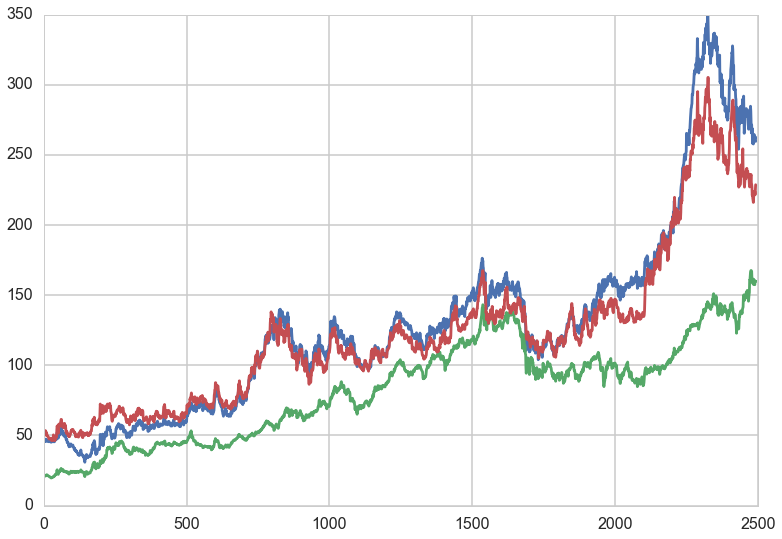

In [8]:
plt.plot(df.index, df["arabica price"])
plt.plot(df.index, df["robusta price"])
plt.plot(df.index, df["futures price"])

In [28]:
#annual Brazil production info
page_prod = requests.get("https://www.quandl.com/api/v3/datasets/BCB/1262.json", params={"start_date": "2001-12-31", "end_date": "2010-12-31", "order": "asc"})

prod_df = pd.DataFrame(page_prod.json()["dataset"]["data"], columns=["year", "prv year prod"])
prod_df["year"] = [int(yr.split("-")[0]) + 1 for yr in prod_df["year"]]

In [39]:
prod_df.head()

,year,prv year prod
0,2002,3639138
1,2003,2610524
2,2004,1987074
3,2005,2465710
4,2006,2140169


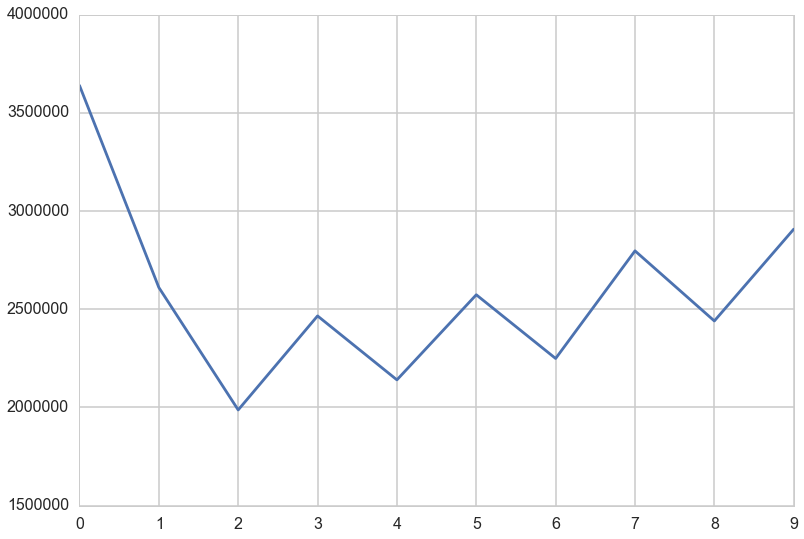

In [44]:
plt.plot(prod_df.index, prod_df["prv year prod"])

resources:
    http://www.investopedia.com/university/commodities/commodities2.asp
    http://www.ico.org/new_historical.asp?section=Statistics
    http://www.wikinvest.com/commodity/Coffee#_note-3